In [3]:
# General Bernstein-Vazirani Algorithm
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [14]:
secretNumber = '101011101'

In [15]:
circuit = QuantumCircuit(len(secretNumber)+1, len(secretNumber))

# circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretNumber)))
circuit.x(len(secretNumber))
circuit.h(len(secretNumber))

circuit.barrier()

#construct a box to put the secretNumber
# for every 1 will be put a cx gate
# 0 corespond for nothing on the quantum bits

for ii, yesno in enumerate(reversed(secretNumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretNumber))

# circuit.cx(5, 6)
# circuit.cx(3, 6)
# circuit.cx(0, 6)

circuit.barrier()
# circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretNumber)))

circuit.barrier()
circuit.measure(range(len(secretNumber)), range(len(secretNumber)))

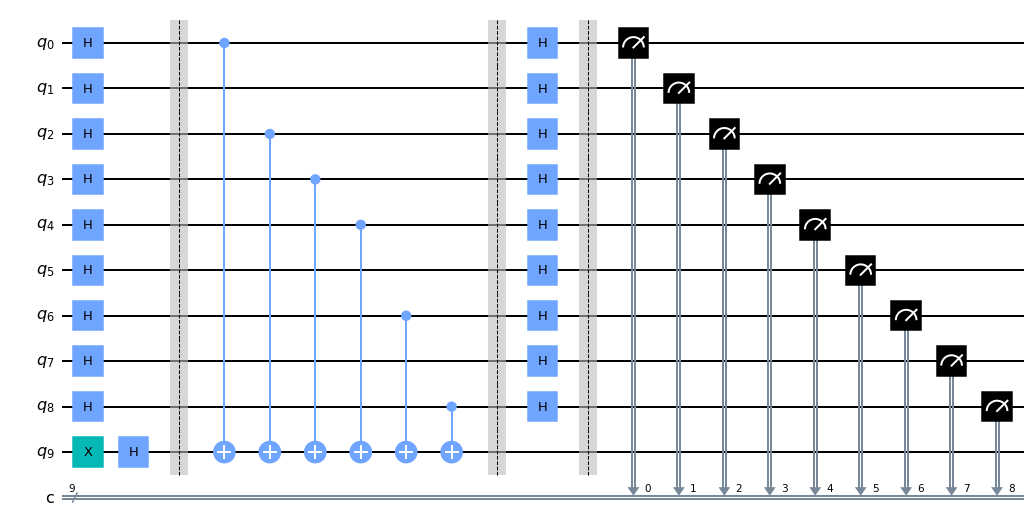

In [16]:
circuit.draw(output='mpl')

In [17]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'101011101': 1}
